[]


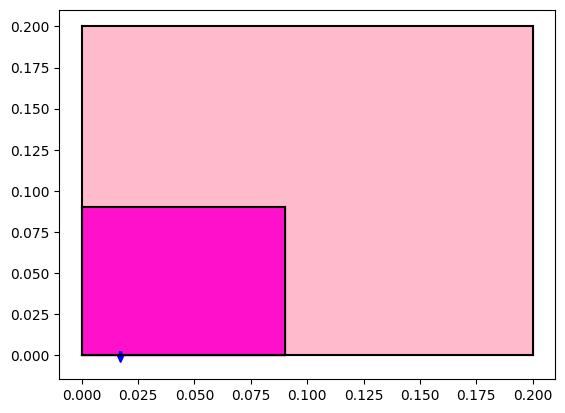

In [3]:
import fluid_fvm.physics as ph
import matplotlib.pyplot as plt
import fluid_fvm.geometry as geo
import fluid_fvm.project as pr
import fluid_fvm.mesh as ms
import fluid_fvm.discretization as dc
import numpy as np

a = geo.Assembly(base_polygon=geo.Polygon([geo.Vector(0,0),geo.Vector(0.2,0),geo.Vector(0.2,0.2), geo.Vector(0,0.2)]), 
                 polygon_list=[geo.Polygon([geo.Vector(0,0),geo.Vector(0.09,0),geo.Vector(0.09,0.09), geo.Vector(0,0.09)])])
a.assemble()

mat = pr.Material("test", gamma = 1, rho = 156, color = "#ffbbcc")
mat2 = pr.Material("test2", gamma = 55, rho = 1056, color = "#ff11cc")

comp = pr.Component()

comp.setAssembly(a)
comp.assignMaterial("Polygon_0", mat)
comp.assignMaterial("Polygon_1", mat2)


mesh_c = ms.RectangularConfig(50,30)
comp.setMesh(mesh_c)

b = ph.Boundary("Dirichlet", 1)

bcdict = {"Line_3" : ph.Boundary("Neumann", 0),"Line_1" : ph.Boundary("Neumann", 0),"Line_0" : ph.Boundary("Dirichlet", 15),"Line_2" : ph.Boundary("Dirichlet", 0),}

c = ph.HeatTransfer(a, bcdict)

comp.setPhysics(c)

fig, ax = plt.subplots()
comp.plot(ax,)
#comp.mesh.plotMesh(ax, vTexts=True)
node = 2
neighbour_idx = 0
neighbour_nodes = mesh_c.getNeigbouringVolumeVectors(node)
neighbour_faces = mesh_c.getNeighbouringFaceLines(node)
neighbour_node_nums = mesh_c.getNeighbouringVolumes(node)

#mesh_c.getVNode(node).plot(ax, fmt = "rx")
neighbour_nodes[neighbour_idx].plotAsVector(ax, vect_0 = mesh_c.getVNode(node))
print(neighbour_node_nums[neighbour_idx])

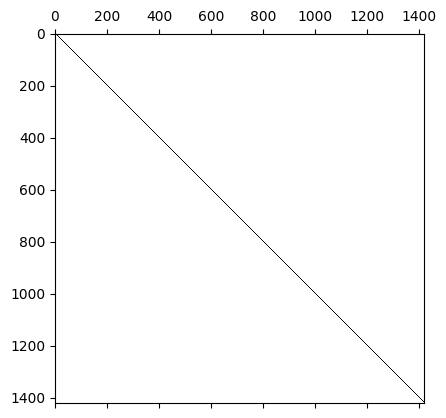

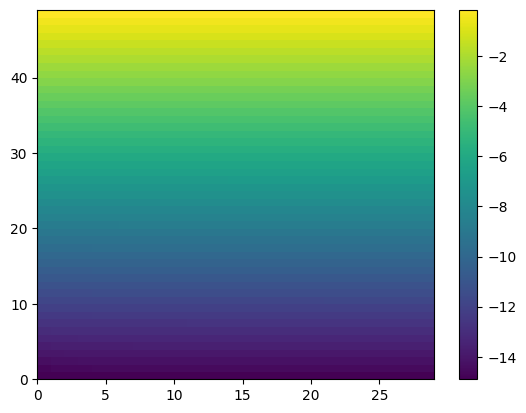

In [4]:
disc = dc.LinearFullDiscretizer(comp)
disc.discretize()
plt.spy(disc.Amrx)
res_math = np.linalg.solve(disc.Amrx, disc.Bmrx)


res = np.zeros((mesh_c.vyNum, mesh_c.vxNum))
for i in range(mesh_c.getVolumeNodeNum()):
        res[mesh_c.math2geoVolume(i)] = res_math[i]
fig, ax = plt.subplots()

pl = plt.pcolor(res)
fig.colorbar(pl)